### Utku Eren Bulut

### 191002048



# Big 5 European League Dataset (2021-2022)
   Footbal League Dataset (2021-2022) dataseti, 2021-2022 sezonunda 5 Avrupa Futbol Ligindeki takımların Sıralamaları, Ülkeleri, Kazandıkları Maç sayısı, Kaybettikleri maç sayısı, attıkları ve yedikleri gol sayıları gibi verileri tutar.


In [1]:
#Kullanılacak kütüphaneleri ekliyoruz.
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt 

In [2]:
#CSV Dosyamızı projemize ekliyoruz
football = pd.read_csv("C:/Users/Utku/Desktop/Big5EuropeanLeagueStats/Big_5_European_Leagues_Stats.csv", encoding = "ISO-8859-1")

In [3]:
football.head()
#Veri setinin ilk 5 satırını çıktı olarak verir

,Rk,Squad,Country,LgRk,MP,W,D,L,GF,GA,GD,Pts,Pts/G,xG,xGA,xGD,xGD/90,Attendance,Goalkeeper
0,1,Manchester City,eng ENG,1,29,22,4,3,68,18,50,70,2.41,66.9,21.2,45.7,1.58,"52,681",Ederson
1,2,Liverpool,eng ENG,2,29,21,6,2,75,20,55,69,2.38,72.0,27.6,44.4,1.53,"53,459",Alisson
2,3,Bayern Munich,de GER,1,27,20,3,4,81,28,53,63,2.33,73.1,27.4,45.7,1.69,"24,214",Manuel Neuer
3,4,Real Madrid,es ESP,1,29,20,6,3,59,25,34,66,2.28,53.4,32.8,20.5,0.71,"38,892",Thibaut Courtois
4,5,Paris S-G,fr FRA,1,29,20,5,4,59,27,32,65,2.24,55.1,29.8,25.3,0.87,"40,513",Keylor Navas


In [4]:
football.tail()
#Veri setinin son 5 satırını çıktı olarak verir

,Rk,Squad,Country,LgRk,MP,W,D,L,GF,GA,GD,Pts,Pts/G,xG,xGA,xGD,xGD/90,Attendance,Goalkeeper
93,94,Genoa,it ITA,18,30,2,16,12,23,47,-24,22,0.73,28.9,41.4,-12.5,-0.42,"9,954",Salvatore Sirigu
94,95,Levante,es ESP,20,29,3,10,16,31,58,-27,19,0.66,35.3,40.8,-5.5,-0.19,"14,411",CÃ¡rdenas
95,96,Norwich City,eng ENG,20,29,4,5,20,18,63,-45,17,0.59,24.7,55.5,-30.8,-1.06,"26,878",Tim Krul
96,97,Greuther FÃ¼rth,de GER,18,27,3,6,18,24,70,-46,15,0.56,26.5,48.3,-21.8,-0.81,"6,311",Sascha Burchert
97,98,Salernitana,it ITA,20,29,3,7,19,22,68,-46,16,0.55,24.7,52.5,-27.8,-0.99,"12,775",Vid Belec


In [5]:
football.info()
#info komutu; verinin türüne, değişken tipine, kaç satırdan oluştuğuna, boş değer içerp içermediğine dair bilgi verir.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Rk          98 non-null     int64  
 1   Squad       98 non-null     object 
 2   Country     98 non-null     object 
 3   LgRk        98 non-null     int64  
 4   MP          98 non-null     int64  
 5   W           98 non-null     int64  
 6   D           98 non-null     int64  
 7   L           98 non-null     int64  
 8   GF          98 non-null     int64  
 9   GA          98 non-null     int64  
 10  GD          98 non-null     int64  
 11  Pts         98 non-null     int64  
 12  Pts/G       98 non-null     float64
 13  xG          98 non-null     float64
 14  xGA         98 non-null     float64
 15  xGD         98 non-null     float64
 16  xGD/90      98 non-null     float64
 17  Attendance  98 non-null     object 
 18  Goalkeeper  98 non-null     object 
dtypes: float64(5), int64(10), objec

In [6]:
football.Squad=pd.Categorical(football.Squad)
football.Country=pd.Categorical(football.Country)
football.Attendance=pd.Categorical(football.Attendance)
#Squad, Country ve Attendance başlıklarını Obje türünden Kategori türüne çevirir.
football.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Rk          98 non-null     int64   
 1   Squad       98 non-null     category
 2   Country     98 non-null     category
 3   LgRk        98 non-null     int64   
 4   MP          98 non-null     int64   
 5   W           98 non-null     int64   
 6   D           98 non-null     int64   
 7   L           98 non-null     int64   
 8   GF          98 non-null     int64   
 9   GA          98 non-null     int64   
 10  GD          98 non-null     int64   
 11  Pts         98 non-null     int64   
 12  Pts/G       98 non-null     float64 
 13  xG          98 non-null     float64 
 14  xGA         98 non-null     float64 
 15  xGD         98 non-null     float64 
 16  xGD/90      98 non-null     float64 
 17  Attendance  98 non-null     category
 18  Goalkeeper  98 non-null     object  
dtypes: categor

In [7]:
football.describe()
#describe() metodu int float gibi sayısal verilere sahip sütunların max, min gibi istatistiksel değerlerini döndürür.

,Rk,LgRk,MP,W,D,L,GF,GA,GD,Pts,Pts/G,xG,xGA,xGD,xGD/90
count,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000
mean,49.500000,10.316327,28.673469,10.530612,7.612245,10.530612,39.765306,39.765306,0.000000,39.183673,1.366837,37.907143,37.896939,-0.002041,-0.000102
std,28.434134,5.706926,1.033216,4.719348,2.630639,4.152267,13.047732,11.509567,21.478832,13.171624,0.455146,10.213779,7.545825,15.810195,0.553222
min,1.000000,1.000000,26.000000,2.000000,3.000000,2.000000,18.000000,18.000000,-46.000000,15.000000,0.550000,21.800000,21.200000,-30.800000,-1.060000
25%,25.250000,5.250000,28.250000,7.000000,6.000000,8.000000,29.000000,31.000000,-15.000000,29.000000,0.977500,30.650000,31.725000,-10.975000,-0.375000
50%,49.500000,10.000000,29.000000,10.000000,8.000000,10.500000,38.000000,39.000000,0.500000,36.500000,1.320000,36.550000,37.750000,-2.500000,-0.090000
75%,73.750000,15.000000,29.000000,14.000000,9.000000,13.000000,48.000000,47.000000,13.750000,48.000000,1.670000,43.550000,42.725000,9.925000,0.337500
max,98.000000,20.000000,30.000000,22.000000,16.000000,20.000000,81.000000,70.000000,55.000000,70.000000,2.410000,73.100000,55.500000,45.700000,1.690000


In [8]:
football.isnull().values.any()
#Veri setindeki eksik veri durumunu sorgular.

False

In [9]:
football.isnull().sum()
#Veri setindeki eksik verilerin kategorilerini verir.

Rk            0
Squad         0
Country       0
LgRk          0
MP            0
W             0
D             0
L             0
GF            0
GA            0
GD            0
Pts           0
Pts/G         0
xG            0
xGA           0
xGD           0
xGD/90        0
Attendance    0
Goalkeeper    0
dtype: int64

In [10]:
FootballTable = football.select_dtypes(include=["category"]) 
#Kategori tipindeki veriler ile yeni bir tablo oluşturur.

In [11]:
FootballTable.head()

,Squad,Country,Attendance
0,Manchester City,eng ENG,"52,681"
1,Liverpool,eng ENG,"53,459"
2,Bayern Munich,de GER,"24,214"
3,Real Madrid,es ESP,"38,892"
4,Paris S-G,fr FRA,"40,513"


In [12]:
FootballTable.Country.unique()
#Country altındaki birbirinden farklı kategorileri gösterir.

['eng ENG', 'de GER', 'es ESP', 'fr FRA', 'it ITA']
Categories (5, object): ['de GER', 'eng ENG', 'es ESP', 'fr FRA', 'it ITA']

In [13]:
FootballTable["Country"].value_counts().count()
#Country altında kaç kategori olduğunu çıkartır.

5

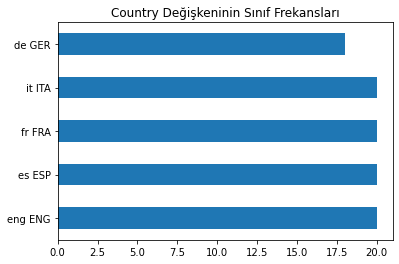

In [14]:
football["Country"].value_counts().plot.barh().set_title("Country Değişkeninin Sınıf Frekansları");

In [15]:
football[["W","Country"]].groupby("Country")["W"].mean()
#Ülkelere göre toplam maç kazanma ortalamaları

Country
de GER     10.277778
eng ENG    11.000000
es ESP     10.100000
fr FRA     10.450000
it ITA     10.800000
Name: W, dtype: float64

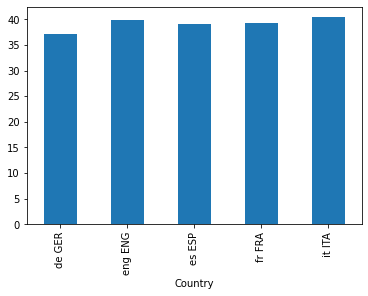

In [16]:
football[["Pts","Country"]].groupby("Country")["Pts"].mean().plot(kind="bar");
#Ülkelere göre toplanan puanların grafiğe yansıması bu şekildedir.

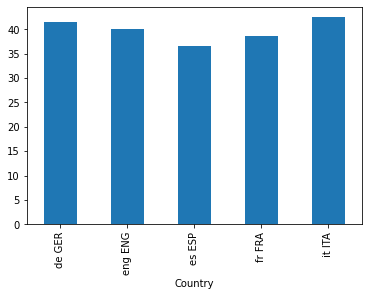

In [17]:
football[["GA","Country"]].groupby("Country")["GA"].mean().plot(kind="bar");
#Bu grafikte ülkelere göre yenilen gol sayılarını gösteren grafiği görüyoruz,eğer grafiği yorumlayacak olursak
#İspanya liginde savunma diğer liglere göre daha ön planda diyebiliriz.

In [18]:
football[["GA","Country"]].groupby("Country")["GA"].sum()
#Ülkelere göre yenilen gollerin sayısal gösterimi ile grağifimizi doğru yorumladığımızı görebiliriz.

Country
de GER     746
eng ENG    800
es ESP     729
fr FRA     773
it ITA     849
Name: GA, dtype: int64

## Bağımlı ve Bağımsız Değişkenler

### Bağımlı Değişken: Gol Farkı (GD)
### Bağımsız Değişken: Atılan Gol(GF) - Yenen Gol(GA)

In [19]:
dff=football
corr = dff.corr()
corr.sort_values(['GD'], ascending = False , inplace= True)

corr.GD

GD        1.000000
Pts/G     0.958248
Pts       0.950100
W         0.930281
xGD/90    0.927670
xGD       0.927197
GF        0.890479
xG        0.839056
MP       -0.000465
D        -0.246132
xGA      -0.807069
GA       -0.856688
L        -0.901511
LgRk     -0.935402
Rk       -0.948009
Name: GD, dtype: float64

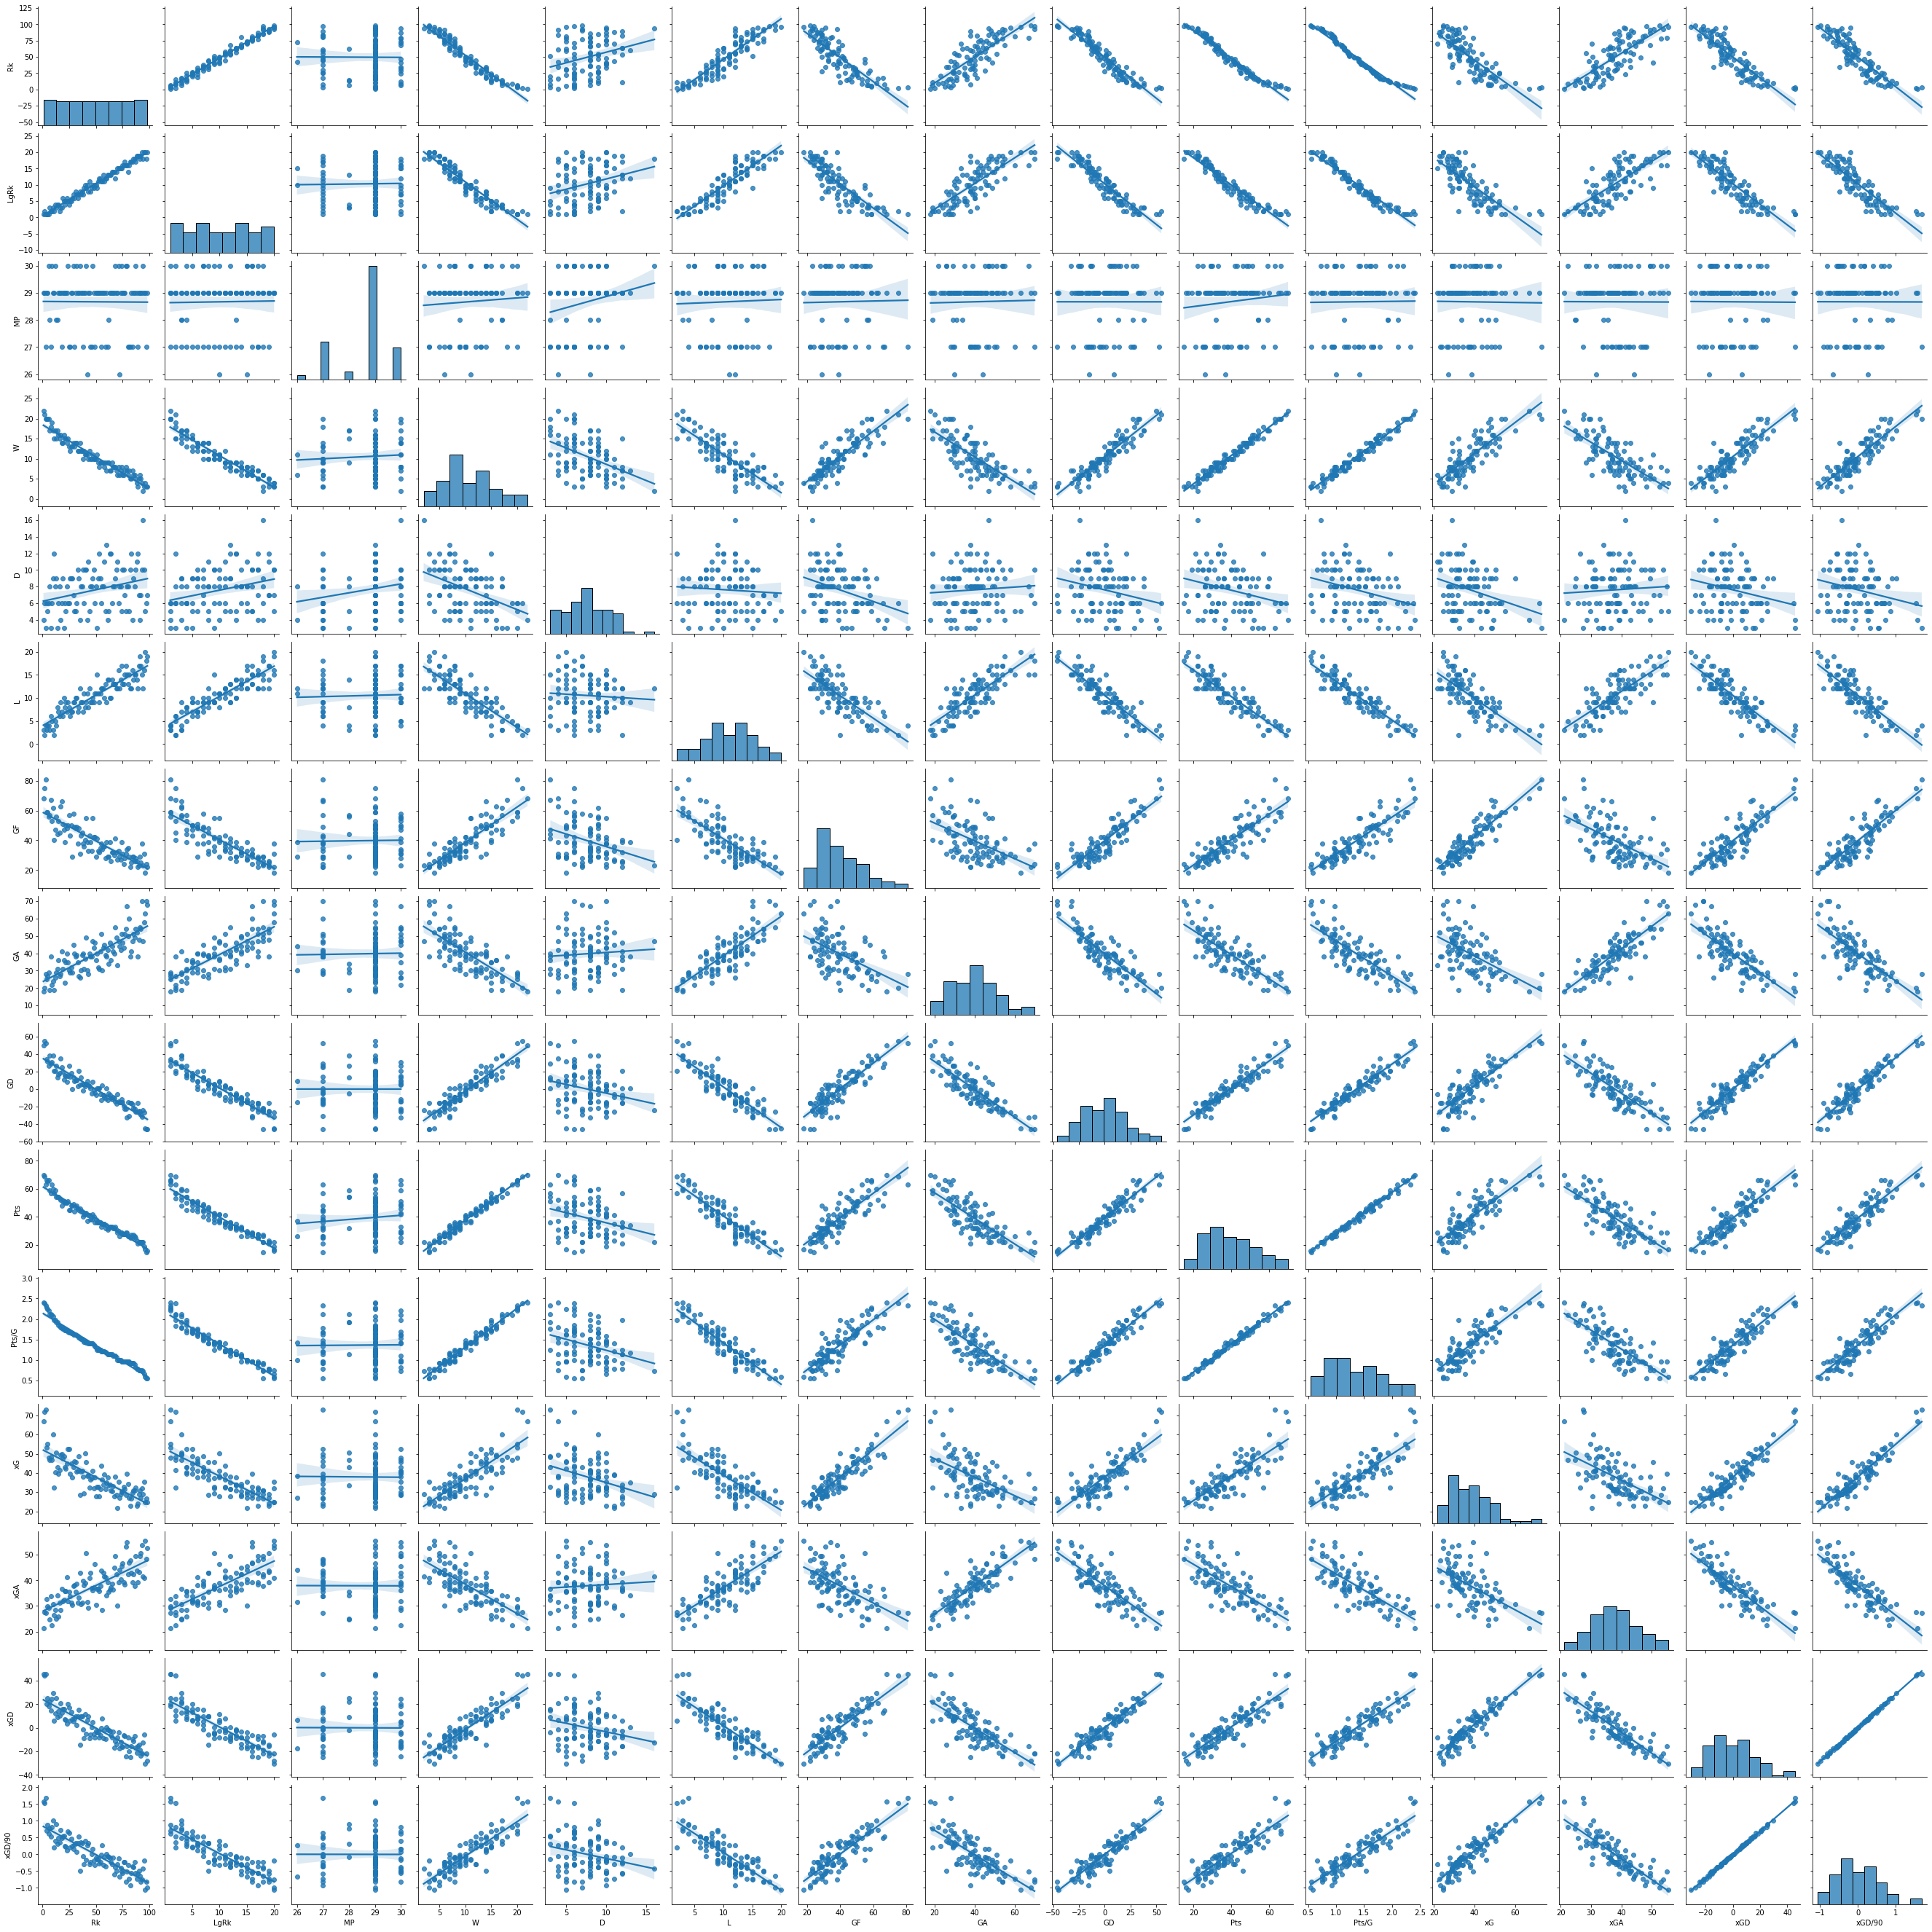

In [20]:
sns.pairplot(dff, kind  ="reg");
#Korelasyon grafiği

### Aykırı Değerin Tespiti

In [21]:
onisleme = pd.read_csv("C:/Users/Utku/Desktop/Big5EuropeanLeagueStats/Big_5_European_Leagues_Stats.csv", encoding = "ISO-8859-1")
onisleme = onisleme.select_dtypes(include=['float64','int64'])
onisleme = onisleme.dropna()
onisleme.head()

,Rk,LgRk,MP,W,D,L,GF,GA,GD,Pts,Pts/G,xG,xGA,xGD,xGD/90
0,1,1,29,22,4,3,68,18,50,70,2.41,66.9,21.2,45.7,1.58
1,2,2,29,21,6,2,75,20,55,69,2.38,72.0,27.6,44.4,1.53
2,3,1,27,20,3,4,81,28,53,63,2.33,73.1,27.4,45.7,1.69
3,4,1,29,20,6,3,59,25,34,66,2.28,53.4,32.8,20.5,0.71
4,5,1,29,20,5,4,59,27,32,65,2.24,55.1,29.8,25.3,0.87


In [22]:
onisleme_TT = onisleme["GD"]
onisleme_TT.head()

0    50
1    55
2    53
3    34
4    32
Name: GD, dtype: int64

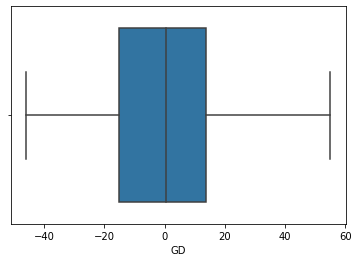

In [23]:
sns.boxplot(x=onisleme_TT);

In [24]:
Q1 = onisleme_TT.quantile(0.25)
Q3 = onisleme_TT.quantile(0.75)
IQR = Q3-Q1

print(Q1)
print(Q3)
print(IQR)

-15.0
13.75
28.75


In [25]:
alt_sinir = Q1- 1.5*IQR
ust_sinir = Q3 + 1.5*IQR
print(alt_sinir)
print(ust_sinir)

-58.125
56.875


### Alt Sınır: -58.125

### Üst Sınır: 56.875

#### Alt Sınırdan küçük veya üst sınırdan büyük değerler aykırı değerlerdir.

In [26]:
(onisleme_TT < alt_sinir) | (onisleme_TT > ust_sinir)

0     False
1     False
2     False
3     False
4     False
      ...  
93    False
94    False
95    False
96    False
97    False
Name: GD, Length: 98, dtype: bool

In [27]:
aykiri_tf = (onisleme_TT < alt_sinir) | (onisleme_TT > ust_sinir)
onisleme_TT[aykiri_tf]

Series([], Name: GD, dtype: int64)

In [28]:
onisleme_TT[aykiri_tf].index

Int64Index([], dtype='int64')

In [29]:
onisleme_TT[aykiri_tf]

Series([], Name: GD, dtype: int64)

In [30]:
onisleme_TT.mean()

0.0

### Sayısal Veriye Dönüşüm

In [31]:
from sklearn import preprocessing 
le = preprocessing.LabelEncoder()

In [32]:
d_f = pd.read_csv("C:/Users/Utku/Desktop/Big5EuropeanLeagueStats/Big_5_European_Leagues_Stats.csv", encoding = "ISO-8859-1")

In [33]:
d_f.Country = pd.Categorical(d_f.Country) 
d_f.Attendance = pd.Categorical(d_f.Attendance)
# obje türünde olan "Country" ve "Attendance" başlıklarını Kategori haline getiriyoruz.

In [34]:
print(d_f.dtypes)

Rk               int64
Squad           object
Country       category
LgRk             int64
MP               int64
W                int64
D                int64
L                int64
GF               int64
GA               int64
GD               int64
Pts              int64
Pts/G          float64
xG             float64
xGA            float64
xGD            float64
xGD/90         float64
Attendance    category
Goalkeeper      object
dtype: object


In [35]:
df_2 = d_f.copy()
df_3 = d_f.copy()

In [36]:
df_2.head()

,Rk,Squad,Country,LgRk,MP,W,D,L,GF,GA,GD,Pts,Pts/G,xG,xGA,xGD,xGD/90,Attendance,Goalkeeper
0,1,Manchester City,eng ENG,1,29,22,4,3,68,18,50,70,2.41,66.9,21.2,45.7,1.58,"52,681",Ederson
1,2,Liverpool,eng ENG,2,29,21,6,2,75,20,55,69,2.38,72.0,27.6,44.4,1.53,"53,459",Alisson
2,3,Bayern Munich,de GER,1,27,20,3,4,81,28,53,63,2.33,73.1,27.4,45.7,1.69,"24,214",Manuel Neuer
3,4,Real Madrid,es ESP,1,29,20,6,3,59,25,34,66,2.28,53.4,32.8,20.5,0.71,"38,892",Thibaut Courtois
4,5,Paris S-G,fr FRA,1,29,20,5,4,59,27,32,65,2.24,55.1,29.8,25.3,0.87,"40,513",Keylor Navas


In [37]:
d_f

,Rk,Squad,Country,LgRk,MP,W,D,L,GF,GA,GD,Pts,Pts/G,xG,xGA,xGD,xGD/90,Attendance,Goalkeeper
0,1,Manchester City,eng ENG,1,29,22,4,3,68,18,50,70,2.41,66.9,21.2,45.7,1.58,"52,681",Ederson
1,2,Liverpool,eng ENG,2,29,21,6,2,75,20,55,69,2.38,72.0,27.6,44.4,1.53,"53,459",Alisson
2,3,Bayern Munich,de GER,1,27,20,3,4,81,28,53,63,2.33,73.1,27.4,45.7,1.69,"24,214",Manuel Neuer
3,4,Real Madrid,es ESP,1,29,20,6,3,59,25,34,66,2.28,53.4,32.8,20.5,0.71,"38,892",Thibaut Courtois
4,5,Paris S-G,fr FRA,1,29,20,5,4,59,27,32,65,2.24,55.1,29.8,25.3,0.87,"40,513",Keylor Navas
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,94,Genoa,it ITA,18,30,2,16,12,23,47,-24,22,0.73,28.9,41.4,-12.5,-0.42,"9,954",Salvatore Sirigu
94,95,Levante,es ESP,20,29,3,10,16,31,58,-27,19,0.66,35.3,40.8,-5.5,-0.19,"14,411",CÃ¡rdenas
95,96,Norwich City,eng ENG,20,29,4,5,20,18,63,-45,17,0.59,24.7,55.5,-30.8,-1.06,"26,878",Tim Krul
96,97,Greuther FÃ¼rth,de GER,18,27,3,6,18,24,70,-46,15,0.56,26.5,48.3,-21.8,-0.81,"6,311",Sascha Burchert


In [38]:
df_3["Rk"] = le.fit_transform(df_2.Rk).astype('float64')
df_3["Squad"] = le.fit_transform(df_2.Squad).astype('float64')
df_3["Country"] = le.fit_transform(df_2.Country).astype('float64')
df_3["LgRk"] = le.fit_transform(df_2.LgRk).astype('float64')
df_3["MP"] = le.fit_transform(df_2.MP).astype('float64')
df_3["W"] = le.fit_transform(df_2.W).astype('float64')
df_3["D"] = le.fit_transform(df_2.D).astype('float64')
df_3["L"] = le.fit_transform(df_2.L).astype('float64')
df_3["GF"] = le.fit_transform(df_2.GF).astype('float64')
df_3["GA"] = le.fit_transform(df_2.GA).astype('float64')
df_3["Pts"] = le.fit_transform(df_2.Pts).astype('float64')
df_3["xG"] = le.fit_transform(df_2.xG).astype('float64')
df_3["xGA"] = le.fit_transform(df_2.xGA).astype('float64')
df_3["xGD"] = le.fit_transform(df_2.xGD).astype('float64')
df_3["Attendance"] = le.fit_transform(df_2.Attendance).astype('float64')
df_3["Goalkeeper"] = le.fit_transform(df_2.Goalkeeper).astype('float64')
# Bağımlı değişken hariç tüm türlerin float64 dönüşümü yapıldı.

In [39]:
df_3

,Rk,Squad,Country,LgRk,MP,W,D,L,GF,GA,GD,Pts,Pts/G,xG,xGA,xGD,xGD/90,Attendance,Goalkeeper
0,0.0,56.0,1.0,0.0,3.0,20.0,1.0,1.0,39.0,0.0,50,43.0,2.41,85.0,0.0,88.0,1.58,77.0,21.0
1,1.0,50.0,1.0,1.0,3.0,19.0,3.0,0.0,40.0,2.0,55,42.0,2.38,86.0,7.0,87.0,1.53,78.0,8.0
2,2.0,10.0,0.0,0.0,1.0,18.0,0.0,2.0,41.0,9.0,53,39.0,2.33,87.0,6.0,88.0,1.69,42.0,52.0
3,3.0,72.0,2.0,0.0,3.0,18.0,3.0,1.0,34.0,6.0,34,41.0,2.28,82.0,24.0,80.0,0.71,65.0,83.0
4,4.0,69.0,3.0,0.0,3.0,18.0,2.0,2.0,34.0,8.0,32,40.0,2.24,83.0,12.0,84.0,0.87,66.0,46.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,93.0,33.0,4.0,17.0,4.0,0.0,11.0,10.0,2.0,28.0,-24,5.0,0.73,16.0,55.0,20.0,-0.42,97.0,76.0
94,94.0,47.0,2.0,19.0,3.0,1.0,7.0,14.0,10.0,36.0,-27,3.0,0.66,40.0,52.0,38.0,-0.19,20.0,14.0
95,95.0,67.0,1.0,19.0,3.0,2.0,2.0,18.0,0.0,38.0,-45,2.0,0.59,4.0,81.0,0.0,-1.06,48.0,85.0
96,96.0,36.0,0.0,17.0,1.0,1.0,3.0,16.0,3.0,41.0,-46,0.0,0.56,5.0,71.0,5.0,-0.81,82.0,78.0
